In [1]:
from htrace import Parse
prefix = "/Users/yangs/Desktop/htrace/wordcount/"

In [2]:
test = Parse(prefix+"1.out", True)

21it [00:02,  7.31it/s]


In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

%config InlineBackend.figure_formats = ['svg']
sns.set(rc={"figure.figsize":(6,6)})
sns.set_style("whitegrid")

In [4]:
df = test.df

## 密度分布图

In [13]:
def func_time_dist(df, name="", bins=30):
    df['begin'] = df['begin'] - df['begin'].min()
    if name == "":
        hist = sns.distplot(df['begin'], kde=False, bins=bins)
    else:
        func = df[df['name']==name]
        hist = sns.distplot(func['begin'], kde=False, bins=bins)
    hist.set(xlabel=name+" time/s", ylabel="count/number")

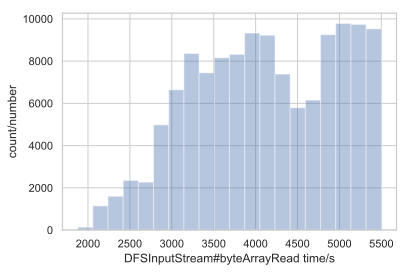

In [14]:
func_time_dist(df, name="DFSInputStream#byteArrayRead", bins=20)

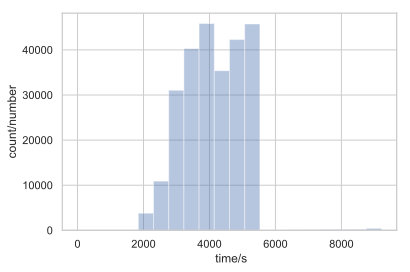

In [15]:
func_time_dist(df, bins=20)

In [80]:
df.name.value_counts()

DFSInputStream#byteArrayRead                127583
DFSInputStream#readWithStrategy             127583
ClientNamenodeProtocol#getFileInfo             204
getFileInfo                                    204
BlockReaderRemote2#readNextPacket              126
dataStreamer                                    80
ClientNamenodeProtocol#rename                   80
DataStreamer#writeTo                            80
DFSClient#rename                                80
DFSOutputStream#writeChunk                      77
ClientNamenodeProtocol#getListing               42
listPaths                                       42
ClientNamenodeProtocol#create                   41
ClientNamenodeProtocol#complete                 41
DFSOutputStream#flushInternal                   41
DistributedFileSystem#create                    41
DFSOutputStream#close                           41
completeFile                                    41
waitForAckedSeqno                               41
newStreamForCreate             

### 雷达图